# Computational Text Analysis (UMN LATIS/Libraries)

## Intro
During this session, we'll go from the basics of working with text (strings) in Python, to plotting sentiment and topics of a corpus of texts. 
- String Manipulation & Methods
- Reading in Text Files
- Text Cleaning (Tokenization & Stemming)
- Word Frequency
- Sentiment

We'll also cover basics of working with Python, including data structures like lists and dictionaries, creating functions, list comprehensions, and importing methods and classes from different libraries.

### Logistics
- Zoom Layout 
    - Turn off Side By Side in view options
    - Set view to 100%
    - Multiple monitors will help
    - Please use the Chat window for questions; we'll be monitoring
- Overview of JupyterLabs
- Scaling Level of Content
    - Our first hour will be entry-level 
    - By the end, more advanced
    - So hopefully something for everyone

### Strings
To work with text in Python it's important to be able to manipulate string variables. Let's create a variable called text_string and print it as output.

In [1]:
text_string = 'Hi there'
print(text_string)

Hi there


We can check what kind of a variable this is by using the built-in type() function in Python.

In [2]:
type(text_string)

str

We can refer to specific characters in the string by slicing it using brackets:

In [3]:
print(text_string[0])

H


In [4]:
text_string[1]

'i'

In [5]:
text_string[0:3]

'Hi '

In [6]:
text_string[3:]

'there'

We can also 'add' or *concatenate* strings together using the plus sign.

In [7]:
text_string + '!'

'Hi there!'

In [8]:
text_string += '!'
print(text_string)

Hi there!


In [9]:
text_string + ' ' + 'How are you today?'

'Hi there! How are you today?'

In [10]:
text_var = "here is my string: I want to find the colon"
count_colons = 0
for t in text_var:
    if t == ':':
        count_colons +=1
print(count_colons)

1


### Built-in string methods
Strings also have built-in methods that can operate on them. These include *join*, *find*, *replace*, *lower* and *upper*

In [11]:
how_string = 'How are you today, Mike?'
how_string.replace('H', 'C')

'Cow are you today, Mike?'

In [12]:
how_string.replace('are you today', 'were you yesterday')

'How were you yesterday, Mike?'

In [13]:
how_string.lower()

'how are you today, mike?'

In [14]:
how_string.upper()

'HOW ARE YOU TODAY, MIKE?'

In [15]:
'x'.join(how_string)

'Hxoxwx xaxrxex xyxoxux xtxoxdxaxyx,x xMxixkxex?'

### Reading files

Usually you want to work with text from files though, and not manually create string variables. 

The first step is to read in the files containing the data. Common file types for text data are: 
* `.txt`
* `.csv`
* `.json`
* `.html` 
* `.xml`

Each file format requires specific Python tools or methods to read, but for our case, we'll be working with .txt files.

#### Reading in `.txt` files

Python has built-in support for reading in `.txt` files.

Let's take a look at the first file in our directory (folder) of State of the Union addresses (`/sotu_text`):

In [16]:
# create a new variable called file1 and read ("r") the first file in the sotu_text folder
file1 = open("sotu_text/215.txt","r") 
print(file1)

<_io.TextIOWrapper name='sotu_text/215.txt' mode='r' encoding='UTF-8'>


In [17]:
# but when we print the variable, it's not yet stored as a string
type(file1)

_io.TextIOWrapper

In [18]:
# to view the text, let's read in the file1 object to a new variable called "text" using .read() and then print out the first250 characters
text = file1.read()

In [19]:
print(text[0:250])

Mr. President, Mr. Speaker, Members of the 104th Congress, my fellow Americans: Again we are here in the sanctuary of democracy, and once again our democracy has spoken. So let me begin by congratulating all of you here in the 104th Congress and cong


### Tokenization

Once we've read in the data, a common next step is to split a longer string into words. This step is referred to as "tokenization". That's because each occurrence of a word is called a "token". Each distinct word used is called a word "type". So the word type "the" may correspond to multiple tokens of "the" in a text.

#### Tokenizing by whitespace
Let's save each word to a list variable called 'tokens'

In [20]:
# use the split() function to split the text variable up by whitespace into a tokens list
tokens = text.split()

In [21]:
counter = 0
for t in tokens:
    if t == 'President':
        counter += 1
print(counter)
        

4


In [22]:
# what kind of a variable is tokens?
type(tokens)

list

### Lists 
You can view each item in a Python list using the same syntax we used above to slice a str variable. The first item in the tokens list is at ```tokens[0]``` and the second is ```tokens[1]```. You can view a range of the first 10 as follows:

In [23]:
tokens[0:10]

['Mr.',
 'President,',
 'Mr.',
 'Speaker,',
 'Members',
 'of',
 'the',
 '104th',
 'Congress,',
 'my']

In [24]:
# the first one
tokens[0]

'Mr.'

In [25]:
# the last ten
tokens[-10:]

['still', 'to', 'come.', 'Thank', 'you,', 'and', 'God', 'bless', 'you', 'all.']

In [26]:
# Note: you can also slice the string variables stored inside of a list
tokens[1][0:5]

'Presi'

### Sentence segmentation

Sentence segmentation involves identifying the boundaries of sentences, and provides a different way to tokenize our text.

#### Sentence segmentation by splitting on punctuation

In [27]:
# instead of the default whitespace for split(), you can identify the character or characters you'd like to split on
sentences = text.split('.')
sentences[0]

'Mr'

We can check how many items are in any list using the len() function.

In [28]:
len(sentences)

467

In [29]:
# note that this method doesn't break out sentences that end with other punctuation, like question marks
sentences[35]

' What are we to do about it? \n\nMore than 60 years ago, at the dawn of another new era, President Roosevelt told our Nation, "New conditions impose new requirements on Government and those who conduct Government'

### Regular Expressions*
We could improve on this by using regular expressions. They allow us to split strings using specific characters or patterns that match different *kinds* of characters. Regex is a very powerful tool, but we won't go into it much today. For help figuring out and working with regular expressions we recommend https://regex101.com/

In [30]:
import re

Here we'll still use a fairly naive segmentation, breaking on any period, question mark, or exclamation point.

In [31]:
# this pattern matches periods, question marks, or exclamation marks
boundary_pattern = r'[.?!]'
sentences_re = re.split(boundary_pattern, text)

The regular expression above is bounded in *r' '* to let Python know it is a regular expression.

Within that the square brackets *[  ]* specify a group of characters that you want to select from. Here you want to match any . ? or !

In [32]:
# there are now a few more sentences in our list
len(sentences_re)

474

In [33]:
# and this sentence ends at the question mark
sentences_re[35]

' What are we to do about it'

### Strip whitespace

This is an extremely common step in text cleaning. It's simple to perform and nicely pre-packaged in Python. It's particularly common for user-generated text (think survey forms).

In [34]:
string = " Hi there! "
string

' Hi there! '

In [35]:
string.strip()

'Hi there!'

We can also use ```strip()``` to remove "line breaks" from strings. Line breaks are often represented with "escape characters" such as ```\n``` in text files.

In [36]:
text[-25:]

' and God bless you all.\n\n'

In [37]:
# we can remove whitespace at the beginning and end of a string using .strip()
stripped_text = text.strip()
stripped_text[-25:]

'u, and God bless you all.'

You can also run more complex find/replace patterns using regex. Here we use ```re.sub()``` to match any \s+ characters with a single space.

In [38]:
# we can use regular expressions to remove whitespace throughout the string
# note that we are replacing any of the matching whitespace patterns with a single space ' '.
whitespace_pattern = r'\s+'
clean_text = re.sub(whitespace_pattern, ' ', text)
clean_text[-25:]

', and God bless you all. '

### Text normalization
Text normalization can help us clean our text to fit some standard patterns. One common normalization step is to remove case from the text.

If you want to count the frequencies of words, for example, using lower case will ensure you don't count "Death" and "death" as two separate words.

In [39]:
caps_string = "Hi There! Can you believe it's 2021?"
caps_string.lower()

"hi there! can you believe it's 2021?"

In [40]:
clean_text = clean_text.lower()
clean_text[0:250]

'mr. president, mr. speaker, members of the 104th congress, my fellow americans: again we are here in the sanctuary of democracy, and once again our democracy has spoken. so let me begin by congratulating all of you here in the 104th congress and cong'

Depending on your analysis, you might also want to throw out numerals.

In [41]:
# remove digits using regex
digits = r'\d+'
re.sub(digits, '', caps_string)

"Hi There! Can you believe it's ?"

In [42]:
# note that since we didn't assign the changes to the string variable, the changes aren't "saved"
caps_string

"Hi There! Can you believe it's 2021?"

#### Removing punctuation

Sometimes you might want to keep only the alphanumeric characters (the letters and numbers) and ditch the punctuation. Here's how we can do that.


In [43]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [44]:
# strip() will remove punctuation from the beginning or end of the string
caps_string.strip(string.punctuation)

"Hi There! Can you believe it's 2021"

The following code looks a little complex, but essentially it will move through each character in our ```caps_string``` variable, and replace any punctuation mark from our ```string.punctuation``` list with a blank string, ```''```

In [45]:
# this code will return all punctuation from the caps_string variable string
''.join(word.strip(string.punctuation) for word in caps_string)

'Hi There Can you believe its 2021'

In [48]:
# let's remove punctuation from our SOTU speech
clean_text = ''.join(word.strip(string.punctuation) for word in clean_text)

### List comprehension

This is what is called a *comprehension* in Python. A way to iterate or loop over multiple similar items, perform a task, and capture the result of that task for each of the items in a single object. It is very consise, and a powerful way to think about repetitive tasks, like text cleaning.

They're easiest to understand by going backwards from the loop and conditions and then seeing what is done to them.

So first, we're looping over each item (which we're calling *char* in the list *clean_text*:
Then, we're running the .strip() method on that item and stripping all punctuation as listed in string.punctuation

In [49]:
# as a for-loop, this would look like the following, but the output wouldn't be saved
for char in clean_text:
    char.strip(string.punctuation)

In [50]:
# as a list comprehension, we can capture the output into a single list
output = [char.strip(string.punctuation) for char in clean_text]
output[0:10]

['m', 'r', ' ', 'p', 'r', 'e', 's', 'i', 'd', 'e']

Lastly, we want that result as a single string, rather than a list of separate words, so we're using some Python slight of hand to make that happen: we're joining, or concatenating each item of that list to an empty string

In [51]:
''.join(output)

'mr president mr speaker members of the 104th congress my fellow americans again we are here in the sanctuary of democracy and once again our democracy has spoken so let me begin by congratulating all of you here in the 104th congress and congratulating you mr speaker if we agree on nothing else tonight we must agree that the american people certainly voted for change in 1992 and in 1994 and as i look out at you i know how some of you must have felt in 1992 laughter i must say that in both years we didnt hear america singing we heard america shouting and now all of us republicans and democrats alike must say we hear you we will work together to earn the jobs you have given us for we are the keepers of a sacred trust and we must be faithful to it in this new and very demanding era over 200 years ago our founders changed the entire course of human history by joining together to create a new country based on a single powerful idea we hold these truths to be selfevident that all men are cr

We're also overwriting the clean_text with the puctuation-stripped string, which is why you see that same variable on both the left and the right hand of the equals.

In [53]:
clean_text = ''.join(char.strip(string.punctuation) for char in clean_text)

In [54]:
clean_text[0:500]

'mr president mr speaker members of the 104th congress my fellow americans again we are here in the sanctuary of democracy and once again our democracy has spoken so let me begin by congratulating all of you here in the 104th congress and congratulating you mr speaker if we agree on nothing else tonight we must agree that the american people certainly voted for change in 1992 and in 1994 and as i look out at you i know how some of you must have felt in 1992 laughter i must say that in both years '

#### Remove anything but letters
We can use a regular expression that matches only upper and lower case letters to remove everything else.

In [58]:
# in this case we sub any non-letter characters out with a space, ' '
print('original string:\n', caps_string)
letters_only = r'[^A-Za-z]+'
re.sub(letters_only, ' ', caps_string)

original string:
 Hi There! Can you believe it's 2021?


'Hi There Can you believe it s '

Again, to step through the RegEx:

- *r' '* bounds the string as a regular expression.
- The square brackets *[  ]* create a group, or class of characters you want to match. In this case: all capital letters A-Z OR all lowercase letters a-z
- The caret at the start of this group *^* negates that grouping.

So, as a result, we match any time we find a non-letter, and the replace it with a space.

### Tokenizing with the Natural Language Toolkit (NLTK)* *

We can also use the Natural Language Toolkit (NLTK) to accomplish many of the steps we showed manually above. Or in the case of our clean_text variable, where we've already removed punctuation, we can use the word_tokenize module to break the text up into its consitutent tokens:

In [59]:
from nltk.tokenize import word_tokenize

In [60]:
tokens = word_tokenize(clean_text)
tokens[:10]

['mr',
 'president',
 'mr',
 'speaker',
 'members',
 'of',
 'the',
 '104th',
 'congress',
 'my']

In [61]:
from nltk.probability import FreqDist

Now that we have a list of tokens we can count their frequencies in the speech. Let's use a builtin NLTK function called FreqDist() to look at our most common words.

In [62]:
#apply the FreqDist function to our tokens variable
fdist = FreqDist(tokens)

#fdist is a dictionary of unique words and the number of times they occur
fdist

FreqDist({'the': 463, 'to': 401, 'and': 348, 'of': 231, 'we': 203, 'in': 180, 'a': 179, 'our': 140, 'that': 133, 'for': 113, ...})

### Dictionaries
A Python dictionary is a way to hold an unordered list of items, using something called a 'key:value' pair. Above you can see the list of keys (tokens) and values (word counts) from the FreqDist dictionary. A good way to differentiate a Python dictionary from a Python list is to look at the brackets used:

* ```{}``` curly brackets for dictionaries
* ```[]``` square brackets for lists

In [64]:
#it also includes a handy method to find the most common words 
fdist.most_common(10)

[('the', 463),
 ('to', 401),
 ('and', 348),
 ('of', 231),
 ('we', 203),
 ('in', 180),
 ('a', 179),
 ('our', 140),
 ('that', 133),
 ('for', 113)]

...which, to make things even more complicated, returns a list (see the square brackets continaing comma-separated items) containing tuples (those objects in parentheses, also containing comma-separated items). But we needn't get overly worried about that here. 

#### Removing stop words

You might have noticed that the most common words above aren't terribly exciting. They're words like "am", "i", "the" and "a": stop words. These are rarely useful to us in computational text analysis, so it's very common to remove them completely.

NLTK includes a stopwords module we can use. Not all stopwords lists are equal though: for your own research you might want to customize a stopwords list, or find one that is best-suited to your domain.

In [65]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

# how many stopwords are on the list?
len(stop)

179

In [66]:
# what are the first ten word on the stopword list?
stop[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

Let's create a new list of tokens, removing our stopwords along the way. 

This loop checks each word in our original tokens list, and if it does *not* appear on the stopword list, it adds it to a new list called tokens_clean.

In [70]:
tokens_clean = [] 
  
for w in tokens: 
    if w not in stop: 
        tokens_clean.append(w)
tokens_clean[0:10]

['mr',
 'president',
 'mr',
 'speaker',
 'members',
 '104th',
 'congress',
 'fellow',
 'americans',
 'sanctuary']

In [71]:
tokens[0:10]

['mr',
 'president',
 'mr',
 'speaker',
 'members',
 'of',
 'the',
 '104th',
 'congress',
 'my']

In [68]:
# advanced we can do the same thing quite efficiently with a list comprehension
tokens_clean = [w for w in tokens if w not in stop]
tokens_clean[0:10]

['mr',
 'president',
 'mr',
 'speaker',
 'members',
 '104th',
 'congress',
 'fellow',
 'americans',
 'sanctuary']

In [72]:
# now we can re-count the most common words after stop words are removed
freq = FreqDist(tokens_clean)
freq.most_common(10)

[('people', 72),
 ('work', 42),
 ('new', 41),
 ('us', 37),
 ('government', 34),
 ('country', 32),
 ('years', 29),
 ('year', 29),
 ('last', 28),
 ('time', 27)]

Hmmm, still not terribly interesting but getting better...

#### Stemming

Stemming and lemmatization both refer to remove morphological affixes on words. For example, if we stem the word "grows", we get "grow". If we stem the word "running", we get "run". We do this because often we care more about the core content of the word (i.e. that it has something to do with growth or running, rather than the fact that it's a third person present tense verb, or progressive participle).

NLTK provides many algorithms for stemming. For English, a great baseline is the [Porter](https://github.com/nltk/nltk/blob/develop/nltk/stem/porter.py) algorithm.

In [73]:
# import the PorterStemmer and then stem the word "states" as an example
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
stemmer.stem('states')

'state'

In [76]:
stemmer.stem('government')

'govern'

In [77]:
stemmer.stem('roosevelt')

'roosevelt'

In a similar manner as the stopwords loop above, we can create a new list of stemmed tokens:

In [78]:
tokens_stemmed = []
for t in tokens_clean:
    tokens_stemmed.append(stemmer.stem(t))

In [79]:
#or as a comprehension:
tokens_stemmed = [stemmer.stem(t) for t in tokens_clean]

In [80]:
tokens_stemmed[0:10]

['mr',
 'presid',
 'mr',
 'speaker',
 'member',
 '104th',
 'congress',
 'fellow',
 'american',
 'sanctuari']

Now that the words are stemmed, are the most common words any different? 

Here are the stemmed top ten.

In [81]:
freq_stemmed = FreqDist(tokens_stemmed)
for f in freq_stemmed.most_common(10):
    print(f)

('peopl', 72)
('work', 69)
('year', 58)
('new', 41)
('american', 40)
('govern', 39)
('us', 37)
('countri', 34)
('cut', 32)
('let', 30)


And the unstemmed top ten:

In [82]:
for f in freq.most_common(10):
    print(f)

('people', 72)
('work', 42)
('new', 41)
('us', 37)
('government', 34)
('country', 32)
('years', 29)
('year', 29)
('last', 28)
('time', 27)


Similar, but with some important differences. Notice that "work" went from 42 to 69 after stemming.  

Why would that be?

### Reading in multiple files

Often, our text data is split across multiple files in a folder. We can read them all into a single variable using a Python tool called glob.

In [83]:
import glob

In [84]:
# save all of the files that end with .txt in the sotu_text/ folder to a variable called sotu_all
sotu_all = glob.glob("sotu_text/*.txt")

In [85]:
# this just saves the file-paths to a list though
sotu_all[0:10]

['sotu_text/060.txt',
 'sotu_text/074.txt',
 'sotu_text/048.txt',
 'sotu_text/114.txt',
 'sotu_text/100.txt',
 'sotu_text/128.txt',
 'sotu_text/129.txt',
 'sotu_text/101.txt',
 'sotu_text/115.txt',
 'sotu_text/049.txt']

Those are out of order though. Let's sort the list so that the list index is in the same order as the speeches themselves (sotu_all[0] would equal 001.txt).

*Something important to note is that **glob** can pull files differently on different systems (Windows/Mac OS/Linux). If you have a numeric identifier to your files, sorting them is always a good idea for reproducibility of your code, regardless of what system it may be run on*

In [86]:
sotu_all.sort()

In [87]:
sotu_all[0:10]

['sotu_text/001.txt',
 'sotu_text/002.txt',
 'sotu_text/003.txt',
 'sotu_text/004.txt',
 'sotu_text/005.txt',
 'sotu_text/006.txt',
 'sotu_text/007.txt',
 'sotu_text/008.txt',
 'sotu_text/009.txt',
 'sotu_text/010.txt']

Now that we have a list of all the files we need to cycle through each one and save the text from the file.

To do that we'll create a new list variable, speeches. For each file in the sotu_all variable we'll open and read the file, and save the text to the speeches list. 

In [88]:
speeches = []
for speech in sotu_all:
    s = open(speech, 'r')
    text = s.read()
    speeches.append(text)

In [89]:
# now we can refer to each speech from the list using the list index
speeches[45][0:250]

'\n\n Fellow Citizens of the Senate and of the House of Representatives: \n\nIn performing my duty at the opening of your present session it gives me pleasure to congratulate you again upon the prosperous condition of our beloved country. Divine Providenc'

In [90]:
#which file is that?
sotu_all[45]

'sotu_text/046.txt'

Here's a short comprehension version to tidy the open/append loop found above.

In [91]:
speeches = [open(speech, 'r').read() for speech in sotu_all]

In [92]:
len(speeches)

236

In [93]:
speeches[235][0:250]

"Thank you. Mr. Speaker, Mr. Vice President, Members of Congress, my fellow Americans: Tonight marks the eighth year that I've come here to report on the State of the Union. And for this final one, I'm going to try to make it a little shorter. I know "

### Creating a Cleaning Function*
Now that we have all the text data loaded, we can think about working on the corpus as a whole.

Let's create a function that combines all of our cleaning protocols so that we can clean each State of the Union speech with a single piece of code. 

The function definition opens with the keyword ```def``` followed by the name of the function (clean_speech) and a parenthesized list of parameter names (speech). The body of the function — the statements that are executed when it runs — is indented below the definition line. The body concludes with a return keyword followed by the return value.

In [94]:
def clean_speech(speech):
    speech = ''.join(word.strip(string.punctuation) for word in speech.lower())
    speech = [stemmer.stem(w) for w in word_tokenize(speech) if w not in stop]
    return speech

You can call the function using the name of the function, and the variable you'd like to process as its parameter. To process only the first speech, for example, you could call:

```clean_speech(speeches[0])```

You could also assign the function's output to a variable so you can work with it later:

```first_cleaned = clean_speech(speeches[0])```

Let's put it all together and clean all of the speeches, and assign them to a new list, ```cleaned_speeches```.

In [95]:
# this cell might take a few minutes to run!
cleaned_speeches = [clean_speech(speech) for speech in speeches]

In [96]:
len(cleaned_speeches)

236

Notice that each item in the cleaned_speeches list is also a list.

In [97]:
type(cleaned_speeches[0])

list

In [101]:
cleaned_speeches[0][0:10]

['fellowcitizen',
 'senat',
 'hous',
 'repres',
 'embrac',
 'great',
 'satisfact',
 'opportun',
 'present',
 'congratul']

### Word Frequencies with ConditionalFreqDist()

In [102]:
import nltk
cfd = nltk.ConditionalFreqDist()

### Matplotlib
We can use a tool called matplotlib to help visualize some of our results. NLTK uses matplotlib as the engine for their .plot() function, but let's call it explicitly here (so we can use it separately later) and also run some Jupyter "magic" to make sure the matplotlib visualizations appear inline (in the display) of our Jupyter view.

In [103]:
import matplotlib.pyplot as plt
%matplotlib inline

#### enumerate()
* The built-in enumerate() function allows us to keep a count of our place in a for loop, and to reference the enumerated variable counter later on. We'll call our counter variable 'i' for index. 
* The first for-loop iterates through each speech in cleaned_speeches
* The second for-loop iterates through each word in the speech at hand.
* We'll unpack the ```cfd['americ'][i]+=1``` code a bit more later on, but note for now that ```+=1``` counts each occurence of any word that starts with 'americ' and ```[i]``` refers to the speech index. 

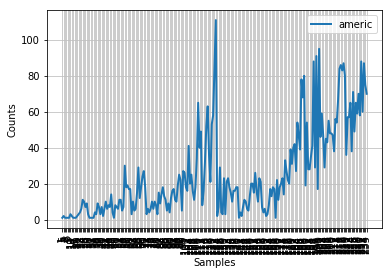

In [104]:
for i,speech in enumerate(cleaned_speeches):
    for w in speech:
        if w.startswith('americ'):
            cfd['americ'][i]+=1            
cfd.plot()

Let's take a closer look at the cfd object. 

In [105]:
cfd

<ConditionalFreqDist with 1 conditions>

In [106]:
type(cfd)

nltk.probability.ConditionalFreqDist

This is a specialized class from nltk, but we interact with it as a Python dictionary. So we can request the items() in cfd:

In [107]:
cfd.items()

dict_items([('americ', FreqDist({123: 111, 200: 95, 198: 91, 196: 88, 231: 88, 218: 87, 233: 87, 216: 86, 122: 85, 215: 84, ...}))])

We can view the dict_item key:

In [108]:
cfd.keys()

dict_keys(['americ'])

The value for cfd dict_key ['americ'] is a FreqDist object. Within FreqDist() there's a regular Python dictionary. In that dictionary, the keys are the speech index, and the values are the term count we supplied in the nested loops above.

In [109]:
cfd['americ']

FreqDist({123: 111, 200: 95, 198: 91, 196: 88, 231: 88, 218: 87, 233: 87, 216: 86, 122: 85, 215: 84, ...})

We could have supplied additional 'conditionals' or terms for the distribution to create a comparative line chart, as well. That would have added additional items to the cfd dictionary.

Here, we can hone in on a specific key from the dictionary that is inside FreqDist, by again calling the key name - which we assigned above to be the speech index. Inside the CFD loop ```cfd['americ'][i]+=1``` the ```[i]``` assigned each key to match the enumerate value, which was the speech index. So the following should show us the number of times words starting with 'americ' appear in the first speech in our corpus:    

In [110]:
cfd['americ'][0]

0

What about the 200th speech?

In [111]:
cfd['americ'][199]

17

It's hard to see from the plot above which specific speeches used the term the most. We can sort the cfd['americ'] dictionary by values to view the highest counts for 'americ'.

We can easily sort sets of values in Python using the sorted() method. Since our counts are the 'value' portion of the 'cfd['americ']' dictionary, with the index as they 'key', we'll want to specify we want to sort the values specifically. By default, Python sorts ascending, so we'll need to specify we want to 'reverse' the sort. Let's see who uses terms like 'america' and 'americans' the most!

In [112]:
sorted(cfd['americ'].values(), reverse=True)[:5]

[111, 95, 91, 88, 88]

You'll note that above we just get the frequencies of 'americ' terms appearing, rather than the index/key or identifier to know which speech that count occurs in. We can specify we want the identifier as follows.

In [113]:
sorted(cfd['americ'], key=cfd['americ'].get, reverse=True)[:5]

[123, 200, 198, 196, 231]

So now we know the speech at the index [123] has the highest count of 'americ' terms. Let's take a closer look.

In [114]:
# who says "americ..." the most?
speeches[123][-250:]

' national improvements, and to submit a plan for their execution; and when the plan has been submitted and approved, and the work carried out, Washington will really become what it ought to be-the most beautiful city in the world.   WILLIAM H. TAFT\n\n'

### Detailed plotting
If we want more control over the plot, we can use MatPlotLib to set some parameters more specifically.

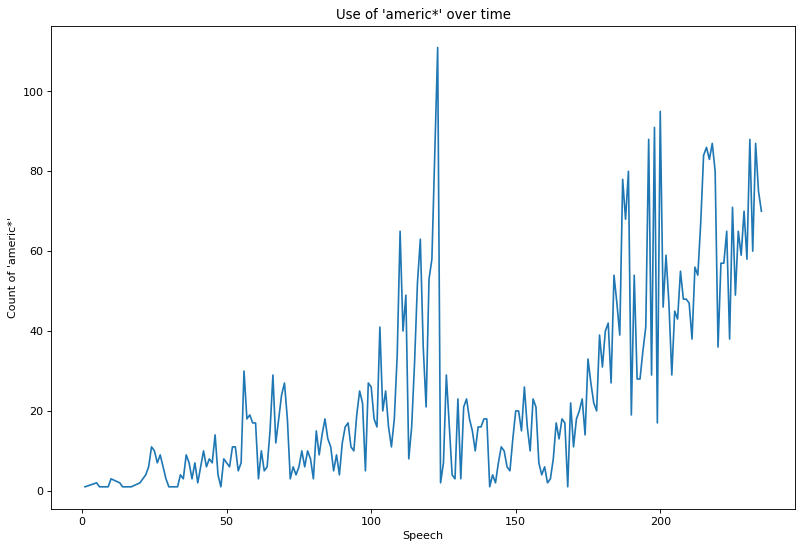

In [115]:
x_speech = list(cfd['americ'].keys())
y_count = list(cfd['americ'].values())
fig=plt.figure(figsize=(12, 8), dpi= 80)
plt.plot(x_speech, y_count)
plt.ylabel("Count of \'americ*\'")
plt.xlabel("Speech")
plt.title("Use of \'americ*\' over time")

plt.show()

### Sentiment Analysis*

Sentiment analysis is an exploratory data analysis technique that "seeks to quantify the emotional intensity of words and phrases within a text." (quote from the [Programming Historian SA tutorial](https://programminghistorian.org/en/lessons/sentiment-analysis))

We can use more NLTK tools to run a simple sentiment analysis on our SOTU corpus. We'll download the vader_lexicon for sentiment analysis and the Vader and Sentiment modules. Don't worry if you see a warning that we don't have the twython library. We won't be using that since we're not analyzing twitter text.

In [116]:
#nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import sentiment

/anaconda3/lib/python3.7/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


Note that we could use a tokenizer that works best for sentiment analysis (see the commented out code below). Since we've already tokenized our text we'll stick with that corpus. 

In [ ]:
#nltk.download('punkt')
#tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

Let's initialize the vader SentimentIntensityAnalyzer and save it to a variable called sid.

In [117]:
sid = SentimentIntensityAnalyzer()

Now we can use the features of the sentiment analysis tool. You can take a look at some of those features by typing sid. and then tabbing through the options.

In [ ]:
#sid

First let's look at the 'polarity_scores' for a specific speech. For Sentiment analysis we don't need the cleaned speech, so we'll go back to our original speeches list.

polarity_scores will give us positive and negative scores. This feature is built into VADER and can be requested on demand.

In [118]:
scores = sid.polarity_scores(speeches[100])
scores

{'neg': 0.062, 'neu': 0.799, 'pos': 0.14, 'compound': 1.0}

### Dictionaries
We can format the output by looping through the scores dictionary. Remember that dictionaries are key:value pairs stored in curly brackets. We can cycle through the scores dictionary like so: 

In [119]:
for key in sorted(scores):
    print('{0}: {1}'.format(key, scores[key]), end='\n')

compound: 1.0
neg: 0.062
neu: 0.799
pos: 0.14


Now let's look at the scores for the entire speeches corpus.
We'll create another dictionary, 'all_scores', that will use the speeches index as the key, and the scores as its value. Note that this means that the value for each item in 'all_scores' will contain *another* dictionary.

This might take a few minutes to run because it has to analyze all 235 speeches.

In [120]:
all_scores = {}
for idx, speech in enumerate(speeches):
    all_scores[idx] = sid.polarity_scores(speech)

Now we can take a look at the scores for specific speeches by referencing the index/key of all_scores:

In [121]:
all_scores[235]

{'neg': 0.094, 'neu': 0.735, 'pos': 0.17, 'compound': 0.9999}

We can look at a specific score by referencing the key within the scores dictionary. 

In [122]:
all_scores[235]['neg']

0.094

From here, we can list all of the negative scores for the corpus. 

To keep it somewhat simple, let's just create a new dictionary that will only contain negative scores. We can create an empty dictionary called negative, then cycle through each key:value item in the all_scores dictionary from above. For each item, we'll assign the index number as its key and the negative score as its value.

In [123]:
negative = {}
for score in all_scores.items():
    negative[score[0]] =  score[1]['neg']

We can use Matplotlib again here to plot out the negative scores for the entire corpus.

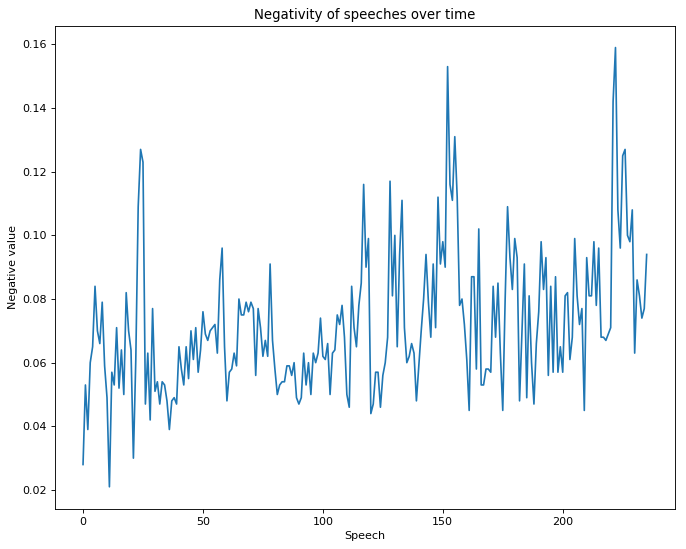

In [124]:
x_speech = list(negative.keys())
y_neg = list(negative.values())
fig=plt.figure(figsize=(10, 8), dpi= 80)
plt.plot(x_speech, y_neg)
plt.ylabel("Negative value")
plt.xlabel("Speech")
plt.title('Negativity of speeches over time')
plt.show()

#### Most negative speeches
The graph gives us a nice visualization of some overall trends, but it's hard to identify specific speeches here. We can just sort our dictionary, using the sorted() method we used above to look at the most negatively scored speeches in the corpus.

In [125]:
sorted(negative, key=negative.get, reverse=True)[:5]

[222, 152, 221, 155, 24]

In [126]:
speeches[222][0:500]

'Mr. Speaker, Vice President Cheney, Members of Congress, distinguished citizens and fellow citizens: Every year, by law and by custom, we meet here to consider the state of the Union. This year, we gather in this Chamber deeply aware of decisive days that lie ahead. \n\nYou and I serve our country in a time of great consequence. During this session of Congress, we have the duty to reform domestic programs vital to our country. We have the opportunity to save millions of lives abroad from a terribl'

#### Least negative speeches
We can use the default sort (ascending values) to view the least negative speeches in the corpus.

In [127]:
sorted(negative, key=negative.get)[:5]

[11, 0, 21, 2, 36]

## Acknowledgements
Some of the code, descriptions, and examples above are taken from:
* UC Berkeley's D-Lab [workshop on Text Analysis Fundamentals](https://dlab.berkeley.edu/training/text-analysis-fundamentals-unsupervised-approaches-10).
* Software Carpentry's open source [Python curriculum](http://swcarpentry.github.io/python-novice-inflammation/).

## Where to Go for Help
- Contact LATISresearch@umn.edu or DASH@umn.edu
- Software Carpentry & Programming Pizza now email-based consultations